KFold (k=10)

1- Importa Bibliotecas:
pandas/numpy: Manipulação de dados ;
sklearn.model_selection: Ferramentas para validação cruzada e divisão de dados ;
sklearn.preprocessing: Normalização/padronização dos dados ;
sklearn.svm: Algoritmo SVM (Máquina de Vetores de Suporte) ;
sklearn.metrics: Métricas de avaliação do modelo ;
sklearn.impute: Tratamento de valores faltantes ;
matplotlib/seaborn: Visualização gráfica ;

2-
Lê o CSV: Carrega o dataset de doença cardíaca ;
Converte para numérico: Garante que todas as colunas sejam numéricas (trata '?' como NaN) ;
Transformação binária: Converte a coluna 'num' em binária (0 = sem doença, 1 = com doença) ;

3-
X: Variáveis independentes (todas exceto 'num') ;
y: Variável alvo (apenas 'num') ;
train_test_split: Divide 80% para treino, 20% para teste ;
stratify=y: Mantém a proporção das classes em treino e teste ;
random_state=42: Garante reprodutibilidade e é a resposta de tudo ;

4-
Imputer: Substitui valores NaN pela média dos dados de treino ;
Scaler: Padroniza os dados (média=0, desvio=1) baseado apenas nos dados de treino ;
O fit é feito apenas no treino para evitar data leakage ;

5-
param_grid: Combinações de hiperparâmetros a testar ;
  -kernel: Tipo de função (linear ou RBF) ;
  -C: Parâmetro de regularização ;
  -gamma: Parâmetro do kernel RBF ;
KFold(n_splits=10): Validação cruzada com 10 folds ;
GridSearchCV: Testa todas as combinações e seleciona a melhor ;

6-
best_model: Melhor modelo encontrado pelo GridSearch ;
y_pred: Previsões no conjunto de teste ;
accuracy_score: Porcentagem de acertos totais ;
confusion_matrix: Matriz que mostra acertos e erros ;

7- Mostra resulados
usa o matplotlib para exibir o grafico da matriz de confusão ;


Melhores parâmetros: {'C': 0.01, 'kernel': 'linear'}
Acurácia média (validação cruzada): 0.852 ± 0.072
Acurácia no teste: 0.770
Desvio padrão (validação cruzada): 0.072
Falsos positivos: 5
Falsos negativos: 9


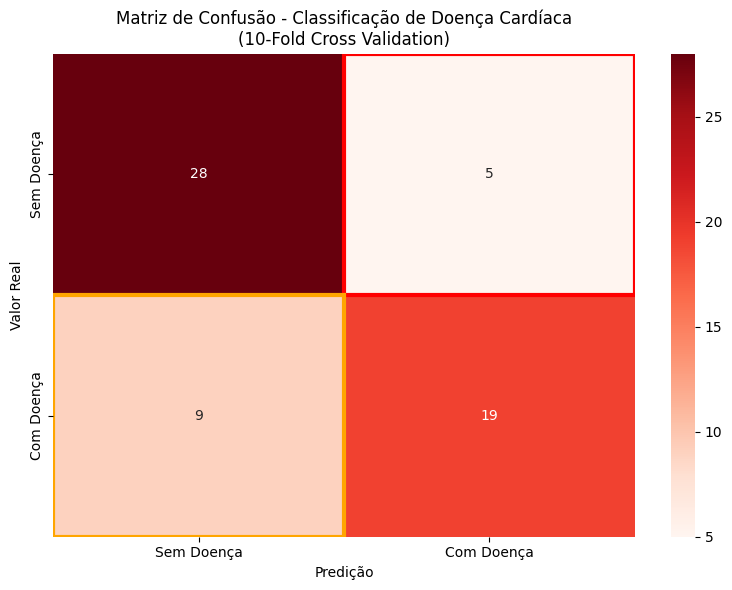

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar e preparar dados
df = pd.read_csv("/heart_disease.csv")
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop("num", axis=1)
y = df["num"]

# 2. Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Pré-processamento
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# 4. Treinar modelo com GridSearch e KFold=10
param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 0.01, 0.001]}
]

grid_search = GridSearchCV(
    SVC(), param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42),
    scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# 5. Avaliar modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 6. Calcular desvio padrão com validação cruzada adicional
cv_scores = cross_val_score(best_model, X_train_scaled, y_train,
                           cv=KFold(n_splits=10, shuffle=True, random_state=42),
                           scoring='accuracy')

# 7. Resultados principais com desvio padrão
print(f"\nMelhores parâmetros: {grid_search.best_params_}")
print(f"Acurácia média (validação cruzada): {grid_search.best_score_:.3f} ± {cv_scores.std():.3f}")
print(f"Acurácia no teste: {accuracy:.3f}")
print(f"Desvio padrão (validação cruzada): {cv_scores.std():.3f}")
print(f"Falsos positivos: {cm[0, 1]}")
print(f"Falsos negativos: {cm[1, 0]}")

# 8. Matriz de confusão com destaque para erros
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=['Sem Doença', 'Com Doença'],
                yticklabels=['Sem Doença', 'Com Doença'])

# Destacar falsos positivos e falsos negativos
ax.add_patch(plt.Rectangle((1, 0), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(plt.Rectangle((0, 1), 1, 1, fill=False, edgecolor='orange', lw=3))
plt.title('Matriz de Confusão - Classificação de Doença Cardíaca\n(10-Fold Cross Validation)')
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.tight_layout()
plt.show()

Leave-P-Out (p=2)

1- Importa Bibliotecas: pandas/numpy: Manipulação de dados ; sklearn.model_selection: Ferramentas para validação cruzada e divisão de dados ; sklearn.preprocessing: Normalização/padronização dos dados ; sklearn.svm: Algoritmo SVM (Máquina de Vetores de Suporte) ; sklearn.metrics: Métricas de avaliação do modelo ; sklearn.impute: Tratamento de valores faltantes ; matplotlib/seaborn: Visualização gráfica ;

2- Lê o CSV: Carrega o dataset de doença cardíaca ; Converte para numérico: Garante que todas as colunas sejam numéricas (trata '?' como NaN) ; Transformação binária: Converte a coluna 'num' em binária (0 = sem doença, 1 = com doença) ;

3- X: Variáveis independentes (todas exceto 'num') ; y: Variável alvo (apenas 'num') ; train_test_split: Divide 80% para treino, 20% para teste ; stratify=y: Mantém a proporção das classes em treino e teste ; random_state=42: Garante reprodutibilidade e é a resposta de tudo ;

4- Imputer: Substitui valores NaN pela média dos dados de treino ; Scaler: Padroniza os dados (média=0, desvio=1) baseado apenas nos dados de treino ; O fit é feito apenas no treino para evitar data leakage ;

5- param_grid: Combinações de kernel, C e gamma ;
LeavePOut(p=2): Validação cruzada que deixa 2 amostras de fora por vez ;
GridSearchCV: Testa combinações e seleciona a melhor ;

6- best_model: Melhor modelo encontrado pelo GridSearch ; y_pred: Previsões no conjunto de teste ; accuracy_score: Porcentagem de acertos totais ; confusion_matrix: Matriz que mostra acertos e erros ;

7- Mostra resulados usa o matplotlib para exibir o grafico da matriz de confusão ;


Melhores parâmetros: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Acurácia média (validação cruzada): 0.853
Desvio padrão da validação cruzada: 0.249
Acurácia no teste: 0.787
Falsos positivos: 2
Falsos negativos: 11


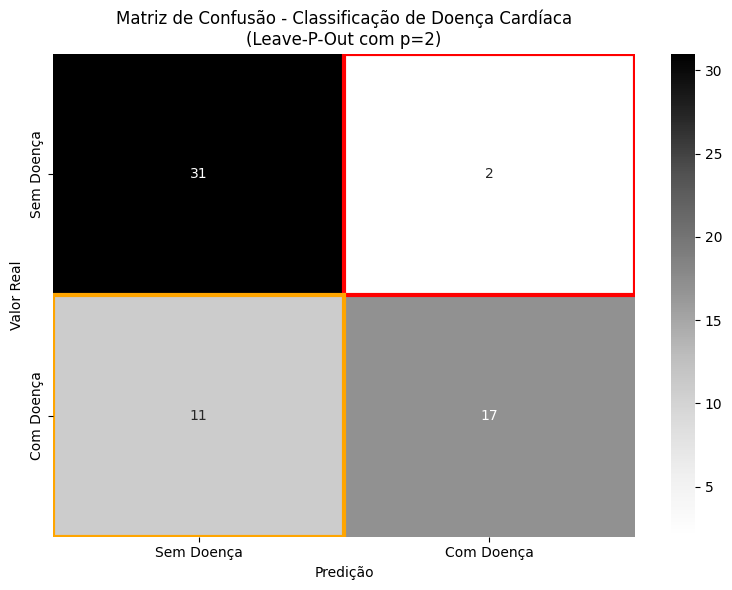

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeavePOut, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar e preparar dados
df = pd.read_csv("/heart_disease.csv")
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop("num", axis=1)
y = df["num"]

# 2. Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Pré-processamento
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# 4. Treinar modelo com GridSearch e Leave-P-Out (p=2)
param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 0.01, 0.001]}
]

# Usando Leave-P-Out com p=2
lpo = LeavePOut(p=2)
grid_search = GridSearchCV(
    SVC(), param_grid, cv=lpo,
    scoring='accuracy', n_jobs=-1, return_train_score=True
)
grid_search.fit(X_train_scaled, y_train)

# 5. Avaliar modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 6. Resultados principais
print(f"\nMelhores parâmetros: {grid_search.best_params_}")
print(f"Acurácia média (validação cruzada): {grid_search.best_score_:.3f}")
print(f"Desvio padrão da validação cruzada: {grid_search.cv_results_['std_test_score'][grid_search.best_index_]:.3f}")
print(f"Acurácia no teste: {accuracy:.3f}")
print(f"Falsos positivos: {cm[0, 1]}")
print(f"Falsos negativos: {cm[1, 0]}")

# 7. Matriz de confusão com destaque para erros
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
                xticklabels=['Sem Doença', 'Com Doença'],
                yticklabels=['Sem Doença', 'Com Doença'])

# Destacar falsos positivos e falsos negativos
ax.add_patch(plt.Rectangle((1, 0), 1, 1, fill=False, edgecolor='red', lw=3))  # Falso positivo
ax.add_patch(plt.Rectangle((0, 1), 1, 1, fill=False, edgecolor='orange', lw=3))  # Falso negativo
plt.title('Matriz de Confusão - Classificação de Doença Cardíaca\n(Leave-P-Out com p=2)')
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.tight_layout()
plt.show()